In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import pandas as pd

In [3]:
bs = 32 # Adjust size according to machine capabilities

In [4]:
np.random.seed(9) # Set specific seed for images

data = ImageDataBunch.from_folder(
    path = ("train"), # using the actual string location works!
    test = ("../test"),
    valid_pct = 0.15,
    bs = bs,
    ds_tfms = get_transforms(), # Add transformations from this url: https://docs.fast.ai/vision.transform.html
    size = 150 #Adjust size accordingly to machine capabilities
    ).normalize(imagenet_stats)

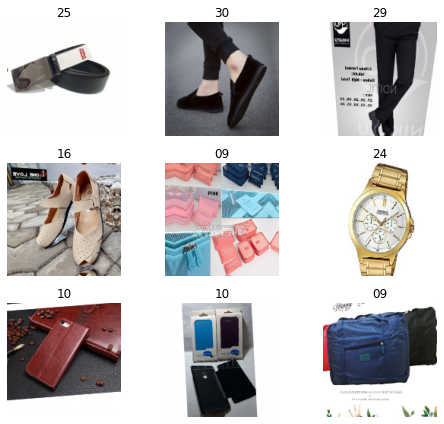

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
# Overview of Classes
print(data.classes)
len(data.classes)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']


42

In [7]:
top_1 = partial(top_k_accuracy, k=1) # The metric used for the Kaggle Competition
learn = cnn_learner(data, models.resnet50, metrics=[top_1,error_rate])

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,top_k_accuracy,error_rate,time
0,1.672181,1.345577,0.633983,0.366017,38:57
1,1.326907,1.158898,0.684717,0.315283,37:26
2,1.262756,1.062872,0.708376,0.291624,36:28
3,1.108104,1.044575,0.714765,0.285235,36:30


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

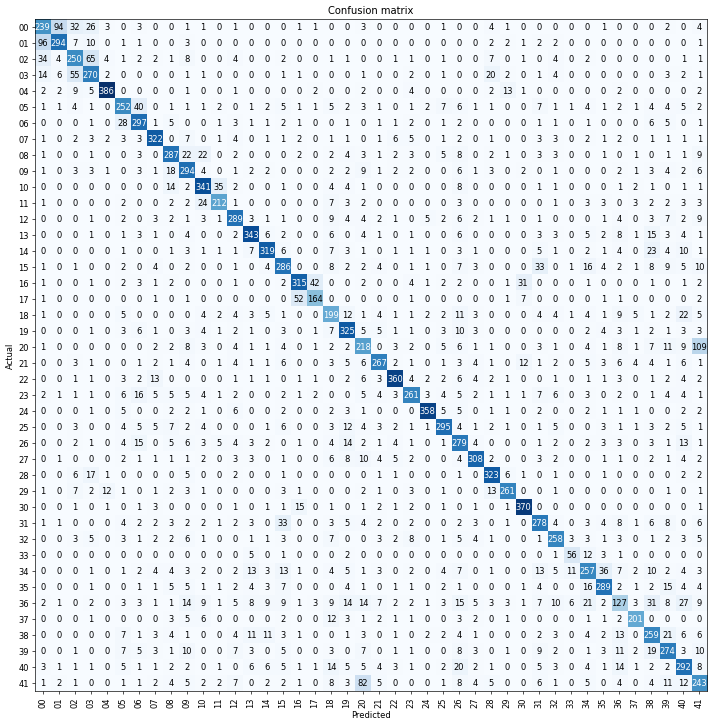

In [10]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

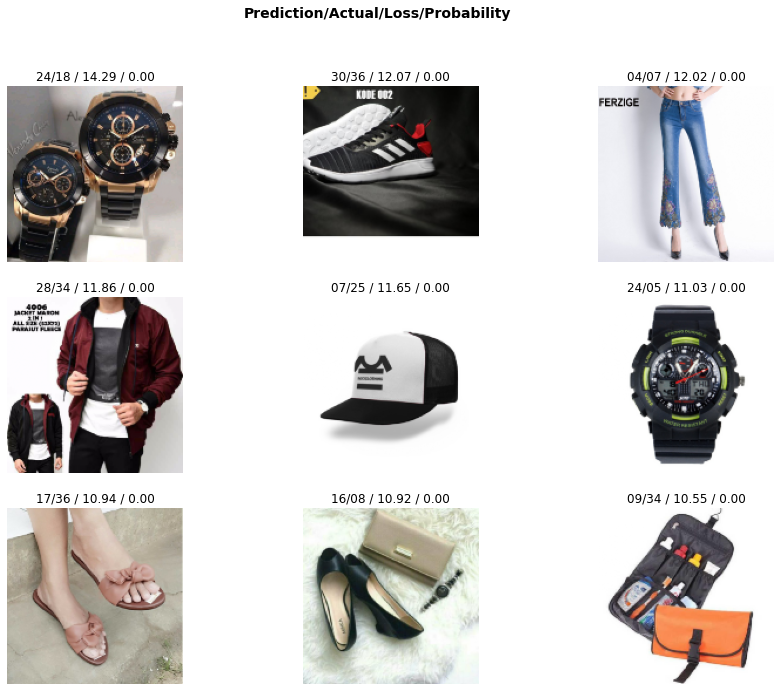

In [11]:
interp.plot_top_losses(9, figsize=(15,11))

In [13]:
interp.most_confused(min_val=30)

[('20', '41', 109),
 ('01', '00', 96),
 ('00', '01', 94),
 ('41', '20', 82),
 ('02', '03', 65),
 ('03', '02', 55),
 ('17', '16', 52),
 ('16', '17', 42),
 ('05', '06', 40),
 ('34', '35', 36),
 ('10', '11', 35),
 ('02', '00', 34),
 ('15', '31', 33),
 ('31', '15', 33),
 ('00', '02', 32),
 ('16', '30', 31),
 ('36', '38', 31)]

#### Saving/Loading Your Model

In [15]:
#learn.save('your-model-name-version')
#learn.load('your-model-name-version')

# Optimizing the model

epoch,train_loss,valid_loss,top_k_accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


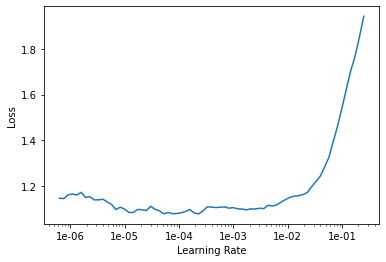

In [19]:
learn.load('your-model-name-version')
learn.lr_find() 
learn.recorder.plot()

In [20]:
learn.unfreeze() # Unfreezing means discarding everything your model has learned
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-2)) # We will teach the model again with a fixed learning rate to follow

epoch,train_loss,valid_loss,top_k_accuracy,error_rate,time
0,1.427325,1.271775,0.655364,0.344636,36:41
1,1.209314,1.087451,0.708502,0.291498,39:01
2,0.918831,0.917208,0.754302,0.245698,38:00
3,0.723965,0.851719,0.771065,0.228935,36:26


In [21]:
#learn.save('your-model-name-version2')

# Output

In [22]:
preds, y = learn.get_preds(DatasetType.Test)

class_score = np.argmax(preds, axis=1)
class_score = class_score.tolist()

ImageId = [os.path.splitext(path)[0] for path in os.listdir('test/test')]

output = pd.DataFrame(zip(ImageId,class_score), columns = (['filename','category'])).sort_values('filename')
output['filename'] = output['filename'] + '.jpg'

testlist = pd.read_csv('test.csv')

output = (output[output['filename'].isin(testlist['filename'])])

output.to_csv('mago_scl_challenge_2_output.csv', index = False)